# Course 1: Project

In [1]:
# Standard library:
import pathlib

from typing import List, Tuple

# 3rd party:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize

%matplotlib inline

## A. Importing, cleaning and numerical summaries

### A.1. Download the data set data.csv from the Resources tab

In [2]:
data_filename = pathlib.Path.cwd().joinpath('data.csv')

### A.2. Import the data as a Pandas DataFrame

In [3]:
df = pd.read_csv(data_filename)

df.head(3)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Malta,27,6.527,1.343280,1.488412,0.821944,0.588767,0.574731,0.153066,1.556863,85.2,Western Europe
1,Zimbabwe,138,3.875,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970,56.3,Africa
2,Cyprus,65,5.621,1.355938,1.131363,0.844715,0.355112,0.271254,0.041238,1.621249,88.7,Eastern Europe


### A.3. Check the number of observations

In [4]:
len(df)  # or df.shape[0]

153

### A.4. Obtain the column headings

In [5]:
df.columns.to_list()  # or list(df) or df.head(0)

['Country',
 'Happiness Rank',
 'Happiness Score',
 'Economy',
 'Family',
 'Health',
 'Freedom',
 'Generosity',
 'Corruption',
 'Dystopia',
 'Job Satisfaction',
 'Region']

### A.5. Check the data type for each column | A.6. Check if there are any missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
Country             153 non-null object
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.4+ KB


**Note:** The data type detected by Pandas for each column is correct.

**Note:** We can see that there are 2 missing values in the column _Job Satisfaction_.

In [7]:
df[df.isna().any(axis=1)]

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
43,North Cyprus,61,5.810,1.346911,1.186303,0.834647,0.471204,0.266846,0.155353,1.549158,NaN,Eastern Europe
61,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,NaN,Africa


### A.7. If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type.

In [8]:
df_clean = df.dropna(axis=0, how='any').copy()
assert len(df_clean) == 151

# Rename for convenience:
df = df_clean

### A.8. Obtain the mean, minimum and maximum value for each column containing numerical data

**Note:** We can use the built-in [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method. (As per the documentation, since `include` defaults to `None`, the result will include all numeric columns.) The `DataFrame` does includes more statistics than requested, though (count, std and percentiles).

In [9]:
df.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
std,44.934732,1.132826,0.420955,0.286371,0.236116,0.150144,0.135236,0.102776,0.502189,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.152574,0.056919,1.605148,68.950000
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.230947,0.089283,1.832910,78.100000
75%,116.500000,6.101500,1.314879,1.418162,0.715975,0.519467,0.323762,0.152207,2.161605,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


Alternatively, we can create a `DataFrame` with only the requested statistics.

In [10]:
def describe_less(df: pd.DataFrame) -> pd.DataFrame:
    pairs = [(df.mean, 'mean'),
             (df.min, 'min'),
             (df.max, 'max')]
    return pd.DataFrame({name: fun(numeric_only=True) for fun, name in pairs}).transpose()

describe_less(df)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


### A.9. List the 10 happiest countries

**Note:** Since a few countries have an identical happiness score, we make sure to use the happiness rank instead of the happiness score.

In [11]:
df.nsmallest(n=10, columns='Happiness Rank')

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
109,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
97,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
47,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
78,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
101,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
105,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
81,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
5,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
21,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe
148,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific


### A.10. List the 10 least happy countries

In [12]:
df.nlargest(n=10, columns='Happiness Rank')

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
79,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa
40,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
45,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
39,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
133,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
53,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
107,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
139,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
138,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific
124,Haiti,145,3.603,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,48.5,Latin America


## B. Indexing and grouping

### B.1. Group the data points by region and save them into separate .csv files

**Note:** It turns out that there are 7 regions in the file (vs. 6 mentioned in the task description). Upon inspection, Ukraine is the only country in the _Europe_ region. Based on [this article](https://en.wikipedia.org/wiki/Eastern_Europe)  on Wikipedia, we add Ukraine to the _Eastern Europe_ region.

In [13]:
df.loc[df['Country'] == 'Ukraine', 'Region'] = 'Eastern Europe'

(df
 .groupby(by='Region')
 .agg({'Country': 'count'})
 .rename(columns={'Country': 'Countries'})
)

,Countries
Region,
Africa,43
Asia-Pacific,43
Eastern Europe,22
Latin America,22
North America,2
Western Europe,19


In [14]:
regions = df['Region'].unique()


def sanitize(region: str) -> str:
    """Converts a region name to a file name."""
    return '_'.join(region.lower().split())


# Map each region name to a DataFrame that contains data points for that region:
region_to_df = {region: df[df['Region'] == region] for region in regions}

# Save each DataFrame:
for region, df_region in region_to_df.items():
    region_filename = pathlib.Path.cwd().joinpath(f'{sanitize(region)}.csv')
    print(f"Saving region '{region}' to '{region_filename.name}'")
    df_region.to_csv(region_filename, index=False)

Saving region 'Western Europe' to 'western_europe.csv'
Saving region 'Africa' to 'africa.csv'
Saving region 'Eastern Europe' to 'eastern_europe.csv'
Saving region 'Asia-Pacific' to 'asia-pacific.csv'
Saving region 'Latin America' to 'latin_america.csv'
Saving region 'North America' to 'north_america.csv'


### B.2. Compute the mean happiness score for each region and rank the regions from most happy to least happy

In [15]:
(df
 .groupby(by='Region')
 .agg({'Happiness Score': 'mean'})
 .rename(columns={'Happiness Score': 'Mean Happiness Score'})
 .sort_values(by='Mean Happiness Score', ascending=False)
)

,Mean Happiness Score
Region,
North America,7.154500
Western Europe,6.880474
Latin America,5.957818
Eastern Europe,5.435182
Asia-Pacific,5.358326
Africa,4.254581


**Note:** North America appears to be the happiest region while Africa appears to be the least happy one.

### B.3. Compute the number of countries in each region that have a happiness score above 6.0

In [16]:
(df
 .groupby(by='Region')
 .agg({'Happiness Score': lambda series: series[series > 6.0].count()})
 .rename(columns={'Happiness Score': 'Countries with Happiness Score > 6.0'})
)

,Countries with Happiness Score > 6.0
Region,
Africa,0.0
Asia-Pacific,11.0
Eastern Europe,1.0
Latin America,13.0
North America,2.0
Western Europe,17.0


### B.4. Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?

In [17]:
(df
 .groupby("Region")
 .agg({"Happiness Score": lambda series: np.max(series) - np.min(series)})
 .rename(columns={'Happiness Score': 'Range of Happiness Score'})
 .sort_values(by='Range of Happiness Score', ascending=False)
)

,Range of Happiness Score
Region,
Asia-Pacific,3.852
Latin America,3.476
Africa,3.179
Western Europe,2.342
Eastern Europe,2.002
North America,0.323


**Note:** Asia-Pacific has the largest range of happiness scores.

## C. Bar plot of the Happiness Score

### C.1. Obtain a horizontal bar plot of the Happiness Score of the top 10 countries

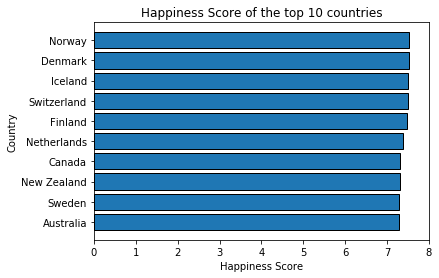

In [18]:
df_top10_hs = df.nlargest(n=10, columns='Happiness Score')

# Ensure countries appear in ascending order:
df_top10_hs_asc = df_top10_hs.iloc[::-1]


def plot_happiness_score_hbar(df: pd.DataFrame) -> None:
    """Plots the hapiness score horizontal bar chart using the current axes."""
    y_coords = np.arange(len(df))
    y_labels = df['Country']

    # Plot horizontal bars:
    plt.barh(y_coords, df['Happiness Score'], edgecolor='black')

    plt.yticks(y_coords, y_labels)
    plt.xlim(0, 8)
    plt.ylabel('Country')
    plt.xlabel('Happiness Score')
    plt.title('Happiness Score of the top 10 countries')

    
plot_happiness_score_hbar(df_top10_hs_asc)
plt.show()

### C.2. Modify the bar chart you obtained in step 1 to turn it into a stacked bar chart

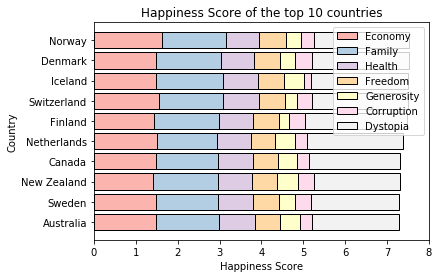

In [19]:
# Helper function:
def get_colors(series: pd.Series, cmap_name: str) -> List[Tuple[float, float, float, float]]:
    """Returns colors in the given color-map for the values in the given (numerical) series."""
    cmap = get_cmap(cmap_name)
    normalize = Normalize(series.min() - 0.1, series.max() + 0.1)
    colors = [cmap(normalize(value)) for value in series]
    return colors

    
def plot_hapiness_score_stackedhbar(df: pd.DataFrame) -> None:
    """Plots the hapiness score stacked horizontal bar chart using the current axes."""
    components = [
        'Economy',
        'Family',
        'Health',
        'Freedom',
        'Generosity',
        'Corruption',
        'Dystopia'
    ]
    
    y_coords = np.arange(len(df))
    y_labels = df['Country']
    
    # Plot horizontal bars component by component:
    colors = get_colors(np.arange(len(components)), 'Pastel1')
    left = np.zeros(len(df))
    for component, color in zip(components, colors):
        plt.barh(y_coords, df[component], left=left, color=color, edgecolor='black', label=component)
        left += df[component]

    plt.yticks(y_coords, y_labels)
    plt.xlim(0, 8)
    plt.ylabel('Country')
    plt.xlabel('Happiness Score')
    plt.title('Happiness Score of the top 10 countries')
    plt.legend()


plot_hapiness_score_stackedhbar(df_top10_hs_asc)
plt.show()

### C.3. Obtain the same stacked bar chart as in step 2 but consider all countries from the region Africa

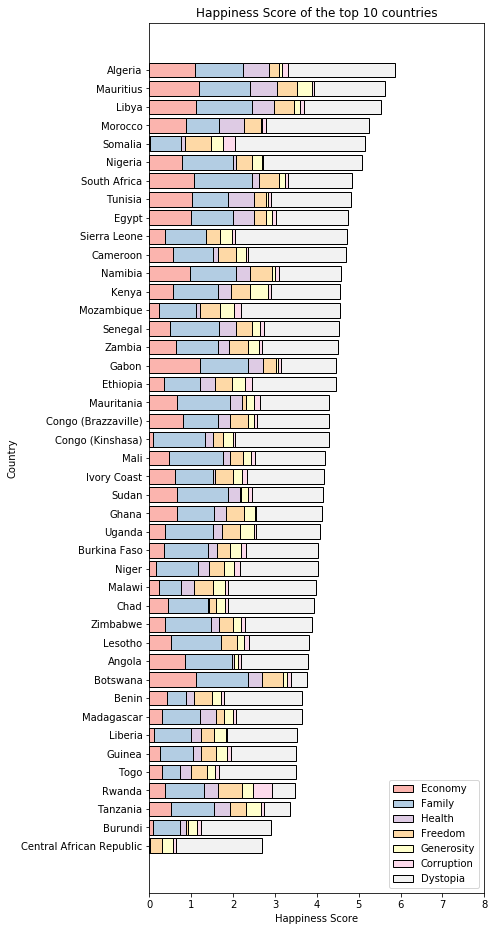

In [20]:
df_africa_hs_asc = region_to_df['Africa'].sort_values('Happiness Score')
plt.figure(figsize=(6.0, 16.0))  # make the figure taller
plot_hapiness_score_stackedhbar(df_africa_hs_asc)
plt.show()

## D. Histogram of Job Satisfaction

### D.1. Obtain a histogram of the Job Satisfaction

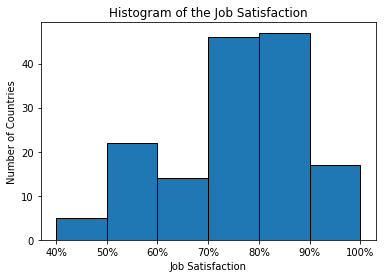

In [21]:
bins = np.arange(40, 100 + 10, 10)  # 40, 50, ..., 100
plt.hist(df['Job Satisfaction'], bins=bins, edgecolor='black')
x_labels = list(f'{edge}%' for edge in bins)
plt.xticks(bins, x_labels)
plt.ylabel('Number of Countries')
plt.xlabel('Job Satisfaction')
plt.title('Histogram of the Job Satisfaction')
plt.show()

## E. Pairwise Scatter plots

### E.1. Obtain scatter plots of the Happiness Score versus each of the other variables

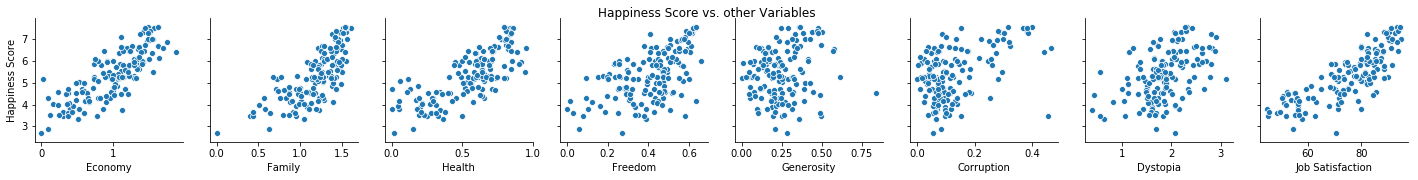

In [22]:
base_var = 'Happiness Score'
other_vars = [
    'Economy',
    'Family',
    'Health',
    'Freedom',
    'Generosity',
    'Corruption',
    'Dystopia',
    'Job Satisfaction'
]

g = sns.pairplot(df, x_vars=other_vars, y_vars=[base_var])
g.fig.suptitle("Happiness Score vs. other Variables")
plt.show()

## F. Correlation

### F.1. Obtain the correlation between the Happiness Score and each of the other variables

In [23]:
# Compute the correlation coefficients (Pearson):
coefficients = {other_var: df[base_var].corr(df[other_var]) for other_var in other_vars}
pd.DataFrame(coefficients, columns=other_vars, index=[base_var])

,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Happiness Score,0.808678,0.749612,0.777731,0.567948,0.164123,0.438262,0.481117,0.812873


**Note:** If one looks only at the components of the Happiness Score, the variable with the highest correlation appears to be the Economy. If one includes the Job Satisfaction as well, the variable with the highest correlation appears to be the Job Satisfaction.

## G. Probabilities

### G.1. Compute the probability that a randomly selected country with Happiness score over 6.0 is from Western Europe

The experiment consists in randomly selecting a country. Let:
* $A$ be the event that the country has a Happiness Score over $6.0$.
* $B$ be the event that the country's Region is Western Europe.

We want to find: $$P(B|A) = \frac{P(A \cap B)}{P(A)} \text{.}$$

In [24]:
p_A_and_B = len(df[(df['Happiness Score'] > 6.0) & (df['Region'] == 'Western Europe')]) / len(df)
p_A = len(df[df['Happiness Score'] > 6.0]) / len(df)
p_B_given_A = p_A_and_B / p_A
print(f'P(B|A) = {p_B_given_A:.2f}, i.e. {p_B_given_A * 100.0:.2f}%')

# Alternatively, we can use the event A as the new World:
df_A = df[df['Happiness Score'] > 6.0]
p_B_given_A = len(df_A[df_A['Region'] == 'Western Europe']) / len(df_A)
print(f'P(B|A) = {p_B_given_A:.2f}, i.e. {p_B_given_A * 100.0:.2f}%')

P(B|A) = 0.39, i.e. 38.64%
P(B|A) = 0.39, i.e. 38.64%


## H. Matrices

### H.1. Define a matrix whose rows correspond to countries and the columns to the regions

Let $C$ be the number of countries and $R$ be the number of regions. We fill in a $C \times R$ matrix $M$ so that
$$
M_{i,j} =
  \begin{cases}
    1 & \quad \text{if the country in row } i \text{ is in the region in column } j \text{,} \\
    0 & \quad \text{otherwise.}
  \end{cases}
$$


**Note:** We number countries starting from 0, in their original order of appearance. We number regions starting from 0, in the order they first appear in the column _Region_.

In [25]:
# We get a series of regions, indexed by country-indices in the contiguous range [0, C):
# (We need to reset the index because we removed a couple of observations in A.7.)
s_regions = df['Region'].reset_index(drop=True)

# We get a map from region-names to region-indices in the contiguous range [0, R):
region_to_index = {region: i for i, region in enumerate(regions)}

# We build the matrix:
M = np.zeros((len(df), len(s_regions)))
for i, region in s_regions.items():
    j = region_to_index[region]
    M[i, j] = 1
    
# Quick check:
assert np.count_nonzero(M == 1) == 151

M

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])